# Data Understanding

## Raw Data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

df = pd.read_csv('https://github.com/CharlieSergeant/goto-project/raw/main/data/raw/Sample%20Data%20for%20Interview%20Project.csv')


### Raw Data Metadatas

Some of the column names were vague or confusing so I'd like to generate a metadata report for someone new to the data. Even just defining some of the abbreviations

In [2]:
df.columns

Index(['Account_id', 'contract_start_date', 'contract_end_date',
       'number_of_employees', 'amount_due_usd', 'churn', 'quantity_due',
       'monthly_amount_due_usd', 'monthly_price_per_seat_due_usd',
       'total_product_owned', 'dids', 'total_calls', 'total_internal_calls',
       'total_outgoing_calls', 'total_incoming_calls', 'total_forwarded_calls',
       'total_call_duration', 'total_call_jointime',
       'total_call_outbound_duration', 'total_call_inbound_duration',
       'total_incoming_calls_answered', 'total_incoming_calls_notanswered',
       'total_incoming_calls_failed', 'total_incoming_calls_busy',
       'total_outgoing_calls_answered', 'total_outgoing_calls_notanswered',
       'total_outgoing_calls_failed', 'total_outgoing_calls_busy',
       'total_calls_recorded', 'total_calls_not_recorded', 'sum_all_cases',
       'inbound_calls_by_dids', 'outbound_calls_by_dids',
       'inbound_mins_by_dids', 'outbound_mins_by_dids', 'gtm_assigned_seats',
       'total_gtm

In [3]:
STATIC_METADATA = [
  {
    "column_name": "Account_id",
    "friendly_name": "Account Identifier",
    "description": "A unique ID that identifies a specific account in the GoToConnect system."
  },
  {
    "column_name": "contract_start_date",
    "friendly_name": "Contract Start Date",
    "description": "The date when the contract for the GoToConnect services started for the customer."
  },
  {
    "column_name": "contract_end_date",
    "friendly_name": "Contract End Date",
    "description": "The date when the contract for the GoToConnect services ended for the customer."
  },
  {
    "column_name": "number_of_employees",
    "friendly_name": "Number of Employees",
    "description": "The number of employees associated with the customer's organization."
  },
  {
    "column_name": "amount_due_usd",
    "friendly_name": "Amount Due (USD)",
    "description": "The amount due in USD for the contract renewal."
  },
  {
    "column_name": "churn",
    "friendly_name": "Churn Indicator",
    "description": "A binary indicator (0 or 1) representing whether the customer churned (1) or not (0)."
  },
  {
    "column_name": "quantity_due",
    "friendly_name": "Quantity Due",
    "description": "The quantity due for the contract renewal."
  },
  {
    "column_name": "monthly_amount_due_usd",
    "friendly_name": "Monthly Amount Due (USD)",
    "description": "The monthly amount due in USD for the contract renewal."
  },
  {
    "column_name": "monthly_price_per_seat_due_usd",
    "friendly_name": "Monthly Price Per Seat Due (USD)",
    "description": "The monthly price per seat due in USD for the contract renewal."
  },
  {
    "column_name": "total_product_owned",
    "friendly_name": "Total Product Owned",
    "description": "The total number of products owned by the customer."
  },
  {
    "column_name": "dids",
    "friendly_name": "Direct Inward Dialing (DIDs)",
    "description": "The number of Direct Inward Dialing phone numbers owned by the customer."
  },
  {
    "column_name": "total_calls",
    "friendly_name": "Total Calls",
    "description": "The total number of calls made by the customer during the specified period."
  },
  {
    "column_name": "total_internal_calls",
    "friendly_name": "Total Internal Calls",
    "description": "The total number of calls made within the customer's organization during the specified period."
  },
  {
    "column_name": "total_outgoing_calls",
    "friendly_name": "Total Outgoing Calls",
    "description": "The total number of outgoing calls made by the customer during the specified period."
  },
  {
    "column_name": "total_incoming_calls",
    "friendly_name": "Total Incoming Calls",
    "description": "The total number of incoming calls received by the customer during the specified period."
  },
  {
    "column_name": "total_forwarded_calls",
    "friendly_name": "Total Forwarded Calls",
    "description": "The total number of calls forwarded by the customer during the specified period."
  },
  {
    "column_name": "total_call_duration",
    "friendly_name": "Total Call Duration",
    "description": "The total duration of all calls made by the customer during the specified period."
  },
  {
    "column_name": "total_call_jointime",
    "friendly_name": "Total Call Jointime",
    "description": "The total jointime of all calls made by the customer during the specified period."
  },
  {
    "column_name": "total_call_outbound_duration",
    "friendly_name": "Total Outbound Call Duration",
    "description": "The total duration of all outgoing calls made by the customer during the specified period."
  },
  {
    "column_name": "total_call_inbound_duration",
    "friendly_name": "Total Inbound Call Duration",
    "description": "The total duration of all incoming calls received by the customer during the specified period."
  },
  {
    "column_name": "total_incoming_calls_answered",
    "friendly_name": "Total Incoming Calls Answered",
    "description": "The total number of incoming calls answered by the customer during the specified period."
  },
  {
    "column_name": "total_incoming_calls_notanswered",
    "friendly_name": "Total Incoming Calls Not Answered",
    "description": "The total number of incoming calls not answered by the customer during the specified period."
  },
  {
    "column_name": "total_incoming_calls_failed",
    "friendly_name": "Total Incoming Calls Failed",
    "description": "The total number of incoming calls that failed during the specified period."
  },
  {
    "column_name": "total_incoming_calls_busy",
    "friendly_name": "Total Incoming Calls Busy",
    "description": "The total number of incoming calls where the line was busy during the specified period."
  },
  {
    "column_name": "total_outgoing_calls_answered",
    "friendly_name": "Total Outgoing Calls Answered",
    "description": "The total number of outgoing calls answered by the customer during the specified period."
  },
  {
    "column_name": "total_outgoing_calls_notanswered",
    "friendly_name": "Total Outgoing Calls Not Answered",
    "description": "The total number of outgoing calls not answered by the customer during the specified period."
  },
  {
    "column_name": "total_outgoing_calls_failed",
    "friendly_name": "Total Outgoing Calls Failed",
    "description": "The total number of outgoing calls that failed during the specified period."
  },
  {
    "column_name": "total_outgoing_calls_busy",
    "friendly_name": "Total Outgoing Calls Busy",
    "description": "The total number of outgoing calls where the recipient's line was busy during the specified period."
  },
  {
    "column_name": "total_calls_recorded",
    "friendly_name": "Total Calls Recorded",
    "description": "The total number of calls recorded by the customer during the specified period."
  },
  {
    "column_name": "total_calls_not_recorded",
    "friendly_name": "Total Calls Not Recorded",
    "description": "The total number of calls not recorded by the customer during the specified period."
  },
  {
    "column_name": "sum_all_cases",
    "friendly_name": "Sum of All Cases",
    "description": "The sum of all cases associated with the customer."
  },
  {
    "column_name": "inbound_calls_by_dids",
    "friendly_name": "Inbound Calls by Direct inward dialing",
    "description": "The number of inbound calls received on Direct Inward Dialing phone numbers during the specified period."
  },
  {
    "column_name": "outbound_calls_by_dids",
    "friendly_name": "Outbound Calls by Direct inward dialing",
    "description": "The number of outbound calls made on Direct Inward Dialing phone numbers during the specified period."
  },
  {
    "column_name": "inbound_mins_by_dids",
    "friendly_name": "Inbound Minutes by Direct inward dialing",
    "description": "The total duration of inbound calls received on Direct Inward Dialing phone numbers during the specified period."
  },
  {
    "column_name": "outbound_mins_by_dids",
    "friendly_name": "Outbound Minutes by Direct inward dialing",
    "description": "The total duration of outbound calls made on Direct Inward Dialing phone numbers during the specified period."
  },
  {
    "column_name": "gtm_assigned_seats",
    "friendly_name": "GoToMeeting (GTM) Assigned Seats",
    "description": "The number of assigned seats for GoToMeeting virtual meetings."
  },
  {
    "column_name": "total_gtm_sessions_fin",
    "friendly_name": "Total GoToMeeting Sessions (Finalized)",
    "description": "The total number of finalized GoToMeeting sessions during the specified period."
  },
  {
    "column_name": "avg_gtm_session_duration_fin",
    "friendly_name": "Average GoToMeeting Session Duration (Finalized)",
    "description": "The average duration of finalized GoToMeeting sessions during the specified period."
  },
  {
    "column_name": "total_gtm_organizers_fin",
    "friendly_name": "Total GoToMeeting Organizers (Finalized)",
    "description": "The total number of organizers of finalized GoToMeeting sessions during the specified period."
  },
  {
    "column_name": "total_gtm_attendees_fin",
    "friendly_name": "Total GoToMeeting Attendees (Finalized)",
    "description": "The total number of attendees of finalized GoToMeeting sessions during the specified period."
  },
  {
    "column_name": "total_gtm_organizer_duration_fin",
    "friendly_name": "Total GoToMeeting Organizer Duration (Finalized)",
    "description": "The total duration of GoToMeeting sessions organized by the customer during the specified period."
  },
  {
    "column_name": "total_gtm_attendee_duration_fin",
    "friendly_name": "Total GoToMeeting Attendee Duration (Finalized)",
    "description": "The total duration of GoToMeeting sessions attended by the customer during the specified period."
  },
  {
    "column_name": "total_gtm_pstn_duration_fin",
    "friendly_name": "Total GoToMeeting PSTN Duration (Finalized)",
    "description": "The total duration of GoToMeeting sessions with Public Switched Telephone Network (PSTN) audio during the specified period."
  },
  {
    "column_name": "total_gtm_voip_duration_fin",
    "friendly_name": "Total GoToMeeting VoIP Duration (Finalized)",
    "description": "The total duration of GoToMeeting sessions with Voice over Internet Protocol (VoIP) audio during the specified period."
  },
  {
    "column_name": "total_gtm_webcam_duration_fin",
    "friendly_name": "Total GoToMeeting Webcam Duration (Finalized)",
    "description": "The total duration of webcam usage in GoToMeeting sessions during the specified period."
  },
  {
    "column_name": "company_size_small_business",
    "friendly_name": "Company Size (Small Business)",
    "description": "A binary indicator (0 or 1) representing whether the customer is categorized as a small business (1) or not (0)."
  },
  {
    "column_name": "company_size_large_size_business",
    "friendly_name": "Company Size (Large Size Business)",
    "description": "A binary indicator (0 or 1) representing whether the customer is categorized as a large-size business (1) or not (0)."
  },
  {
    "column_name": "company_size_not_available",
    "friendly_name": "Company Size (Not Available)",
    "description": "A binary indicator (0 or 1) representing whether the company size information is not available (1) or available (0)."
  },
  {
    "column_name": "company_size_mid_size_business",
    "friendly_name": "Company Size (Mid-Size Business)",
    "description": "A binary indicator (0 or 1) representing whether the customer is categorized as a mid-size business (1) or not (0)."
  },
  {
    "column_name": "market_aus_row",
    "friendly_name": "Market (AUS ROW)",
    "description": "A binary indicator (0 or 1) representing whether the customer is located in the AUS ROW market (1) or not (0)."
  },
  {
    "column_name": "market_emea",
    "friendly_name": "Market (EMEA)",
    "description": "A binary indicator (0 or 1) representing whether the customer is located in the EMEA market (1) or not (0)."
  },
  {
    "column_name": "market_latam",
    "friendly_name": "Market (LATAM)",
    "description": "A binary indicator (0 or 1) representing whether the customer is located in the LATAM market (1) or not (0)."
  },
  {
    "column_name": "market_na",
    "friendly_name": "Market (NA)",
    "description": "A binary indicator (0 or 1) representing whether the customer is located in the NA market (1) or not (0)."
  },
  {
    "column_name": "support_cases",
    "friendly_name": "Support Cases",
    "description": "The number of support cases raised by the customer during the specified period."
  },
  {
    "column_name": "avg_call_quality_score",
    "friendly_name": "Average Call Quality Score",
    "description": "The average call quality score for calls made by the customer during the specified period."
  },
  {
    "column_name": "total_ring_group",
    "friendly_name": "Total Ring Group",
    "description": "The total number of ring groups associated with the customer."
  },
  {
    "column_name": "total_call_queue",
    "friendly_name": "Total Call Queue",
    "description": "The total number of call queues associated with the customer."
  },
  {
    "column_name": "total_dial_plan",
    "friendly_name": "Total Dial Plan",
    "description": "The total number of dial plans associated with the customer."
  },
  {
    "column_name": "virtual_fax_machine",
    "friendly_name": "Virtual Fax Machine",
    "description": "A binary indicator (0 or 1) representing whether the customer has a virtual fax machine (1) or not (0)."
  }
]


### Autogenerate rest of metadata

In [4]:
null_counts = df.isnull().sum()
datatypes = df.dtypes

def entropy(column):
    try:
        value_counts = column.value_counts(normalize=True)
        return -np.sum(value_counts * np.log2(value_counts))
    except Exception as e:
        return None

# Function to calculate outlier percentage
def calculate_outlier_percentage(column):
    try:
        q1 = column.quantile(0.25)
        q3 = column.quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        outliers = column[(column > upper_bound) | (column < lower_bound)]
        return len(outliers) / len(column) * 100
    except Exception as e:
        return None


def run_metadata(df):
    metadata_df = pd.DataFrame(STATIC_METADATA)
    # Calculate the datatype, unique_value_counts, entropy, default_value, min, max, mode, mean, std, and outlier % for each column
    datatypes = df.dtypes.reset_index().rename(columns={'index': 'column_name', 0: 'datatype'})
    unique_value_counts = df.nunique().reset_index().rename(columns={'index': 'column_name', 0: 'unique_value_counts'})
    entropy_values = df.apply(entropy).reset_index().rename(columns={'index': 'column_name', 0: 'entropy'})
    default_values = df.mode().iloc[0].reset_index().rename(columns={'index': 'column_name', 0: 'default_value'})
    min_values = df.min().reset_index().rename(columns={'index': 'column_name', 0: 'min'})
    max_values = df.max().reset_index().rename(columns={'index': 'column_name', 0: 'max'})
    mode_values = df.mode().iloc[0].reset_index().rename(columns={'index': 'column_name', 0: 'mode'})
    mean_values = df.mean().reset_index().rename(columns={'index': 'column_name', 0: 'mean'})
    std_values = df.std().reset_index().rename(columns={'index': 'column_name', 0: 'std'})
    outlier_percentage = df.apply(calculate_outlier_percentage).reset_index().rename(columns={'index': 'column_name', 0: 'outlier %'})

    # Merge all the calculated values into the metadata_df DataFrame
    metadata_df = pd.merge(metadata_df, datatypes, on='column_name', how='left')
    metadata_df = pd.merge(metadata_df, unique_value_counts, on='column_name', how='left')
    metadata_df = pd.merge(metadata_df, entropy_values, on='column_name', how='left')
    metadata_df = pd.merge(metadata_df, default_values, on='column_name', how='left')
    metadata_df = pd.merge(metadata_df, min_values, on='column_name', how='left')
    metadata_df = pd.merge(metadata_df, max_values, on='column_name', how='left')
    metadata_df = pd.merge(metadata_df, mode_values, on='column_name', how='left')
    metadata_df = pd.merge(metadata_df, mean_values, on='column_name', how='left')
    metadata_df = pd.merge(metadata_df, std_values, on='column_name', how='left')
    metadata_df = pd.merge(metadata_df, outlier_percentage, on='column_name', how='left')
    return metadata_df






metadata_df = run_metadata(df)
metadata_df.to_csv('./raw_metadata.csv',index=False)

<ipython-input-4-555f12926b3e>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean().reset_index().rename(columns={'index': 'column_name', 0: 'mean'})
<ipython-input-4-555f12926b3e>:36: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_values = df.std().reset_index().rename(columns={'index': 'column_name', 0: 'std'})


In [5]:
metadata_df

,column_name,friendly_name,description,datatype,unique_value_counts,entropy,default_value,min,max,mode,mean,std,outlier %
0,Account_id,Account Identifier,A unique ID that identifies a specific account...,object,15563,13.699406,1111A11112Dnvi7QAA,1111311111A301CAAQ,111A111101ZGgGyAAL,1111A11112Dnvi7QAA,NaN,NaN,NaN
1,contract_start_date,Contract Start Date,The date when the contract for the GoToConnect...,object,7,2.602804,2021-11-01T00:00:00.000Z,2021-11-01T00:00:00.000Z,2022-05-01T00:00:00.000Z,2021-11-01T00:00:00.000Z,NaN,NaN,NaN
2,contract_end_date,Contract End Date,The date when the contract for the GoToConnect...,object,7,2.602804,2021-11-30T00:00:00.000Z,2021-11-30T00:00:00.000Z,2022-05-31T00:00:00.000Z,2021-11-30T00:00:00.000Z,NaN,NaN,NaN
3,number_of_employees,Number of Employees,The number of employees associated with the cu...,int64,493,5.352577,0,0,380000,0,367.245200,4.886186e+03,13.715
4,amount_due_usd,Amount Due (USD),The amount due in USD for the contract renewal.,float64,10222,12.620076,20.2,7.32,67643.0,20.2,350.030958,1.208052e+03,10.875
5,churn,Churn Indicator,A binary indicator (0 or 1) representing wheth...,int64,2,0.197890,0,0,1,0,0.030700,1.725080e-01,3.070
6,quantity_due,Quantity Due,The quantity due for the contract renewal.,int64,381,4.915544,1,1,5570,1,19.085350,8.149979e+01,11.275
7,monthly_amount_due_usd,Monthly Amount Due (USD),The monthly amount due in USD for the contract...,float64,10222,12.620076,20.2,7.32,67643.0,20.2,350.030958,1.208052e+03,10.875
8,monthly_price_per_seat_due_usd,Monthly Price Per Seat Due (USD),The monthly price per seat due in USD for the ...,float64,3696,10.663032,20.2,0.03,1174.9,20.2,34.646867,5.137680e+01,8.840
9,total_product_owned,Total Product Owned,The total number of products owned by the cust...,int64,16,1.264365,1,1,16,1,1.529250,1.524126e+00,23.070


## Univariate analysis

array([[<Axes: title={'center': 'number_of_employees'}>,
        <Axes: title={'center': 'amount_due_usd'}>,
        <Axes: title={'center': 'churn'}>],
       [<Axes: title={'center': 'quantity_due'}>,
        <Axes: title={'center': 'monthly_amount_due_usd'}>,
        <Axes: title={'center': 'monthly_price_per_seat_due_usd'}>],
       [<Axes: title={'center': 'total_product_owned'}>,
        <Axes: title={'center': 'dids'}>,
        <Axes: title={'center': 'total_calls'}>],
       [<Axes: title={'center': 'total_internal_calls'}>,
        <Axes: title={'center': 'total_outgoing_calls'}>,
        <Axes: title={'center': 'total_incoming_calls'}>],
       [<Axes: title={'center': 'total_forwarded_calls'}>,
        <Axes: title={'center': 'total_call_duration'}>,
        <Axes: title={'center': 'total_call_jointime'}>],
       [<Axes: title={'center': 'total_call_outbound_duration'}>,
        <Axes: title={'center': 'total_call_inbound_duration'}>,
        <Axes: title={'center': 'total_

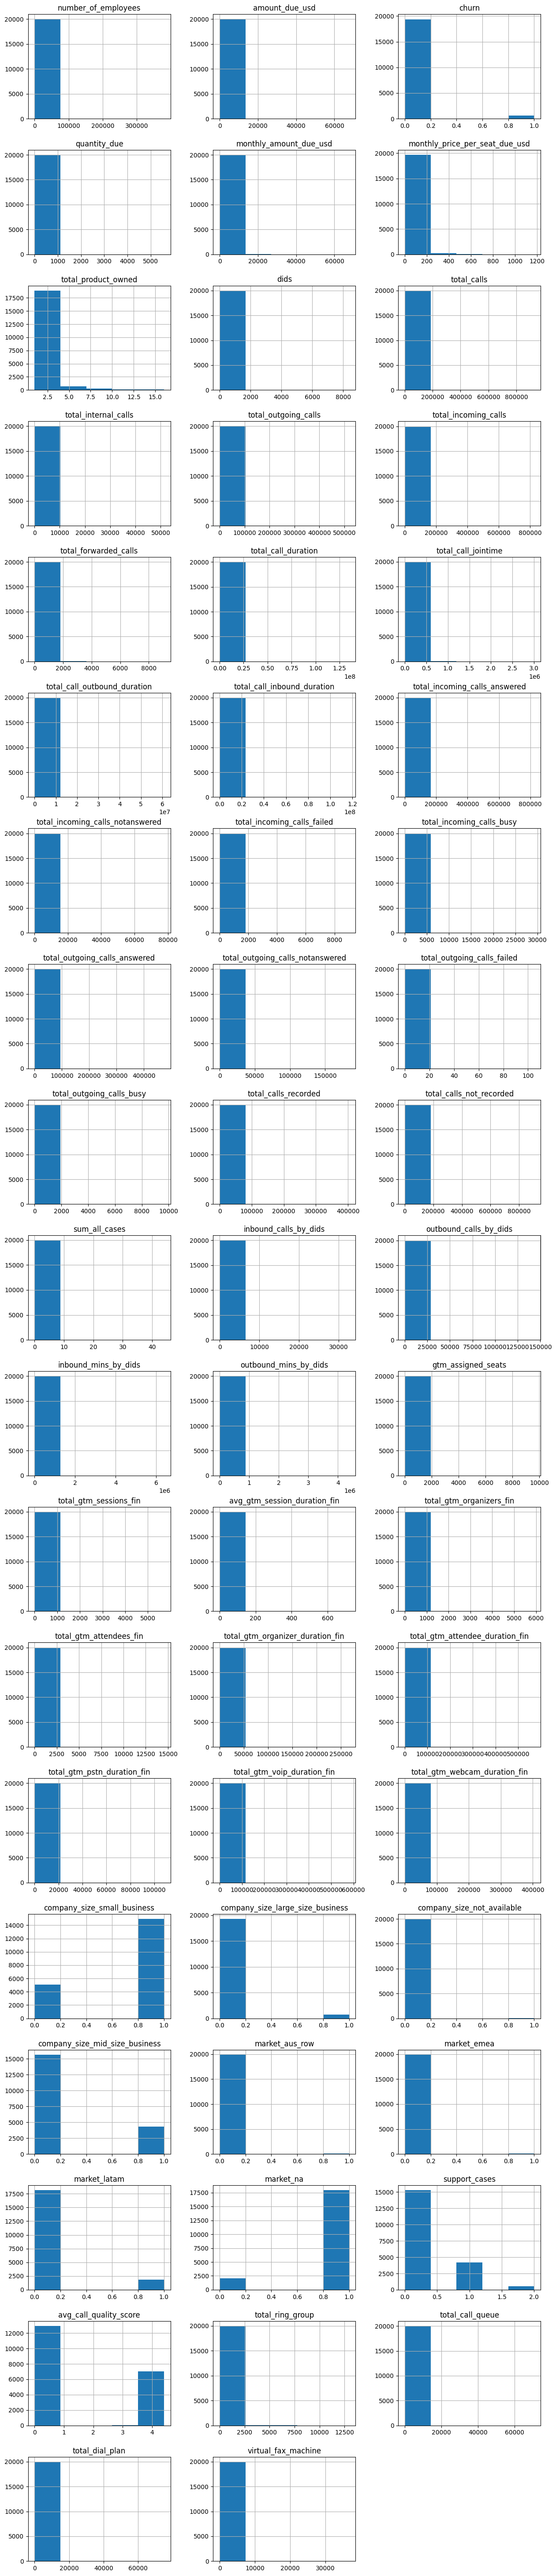

In [6]:
numerical_cols = metadata_df.loc[((metadata_df['datatype']=='float64')|(metadata_df['datatype']=='int64'))].column_name.values
df[numerical_cols].hist( layout= (19,3), figsize=(15,75), bins = 5)

There are some very skewed attributes

There also seems to be some outliers in some of the attributes

Our target variable is not balanced (as most retention problems are)

---

I plan to try to group some of the imbalanced data attributes

## Bivariate Analysis

In [ ]:
numerical_cols

array(['number_of_employees', 'amount_due_usd', 'churn', 'quantity_due',
       'monthly_amount_due_usd', 'monthly_price_per_seat_due_usd',
       'total_product_owned', 'dids', 'total_calls',
       'total_internal_calls', 'total_outgoing_calls',
       'total_incoming_calls', 'total_forwarded_calls',
       'total_call_duration', 'total_call_jointime',
       'total_call_outbound_duration', 'total_call_inbound_duration',
       'total_incoming_calls_answered',
       'total_incoming_calls_notanswered', 'total_incoming_calls_failed',
       'total_incoming_calls_busy', 'total_outgoing_calls_answered',
       'total_outgoing_calls_notanswered', 'total_outgoing_calls_failed',
       'total_outgoing_calls_busy', 'total_calls_recorded',
       'total_calls_not_recorded', 'sum_all_cases',
       'inbound_calls_by_dids', 'outbound_calls_by_dids',
       'inbound_mins_by_dids', 'outbound_mins_by_dids',
       'gtm_assigned_seats', 'total_gtm_sessions_fin',
       'avg_gtm_session_duration_fi

In [ ]:
selected_cols = [
    'number_of_employees',
    'amount_due_usd',
    'churn',
    'quantity_due',
    'dids',
    'total_calls',
    'gtm_assigned_seats',
    'support_cases',
    'avg_call_quality_score',
    'total_ring_group',
    'total_call_queue',
    'total_dial_plan',
    'virtual_fax_machine'
    ]
df[selected_cols]

,number_of_employees,amount_due_usd,churn,quantity_due,dids,total_calls,gtm_assigned_seats,support_cases,avg_call_quality_score,total_ring_group,total_call_queue,total_dial_plan,virtual_fax_machine
0,5,99.86,0,2,15,44,4,0,0.00,56,56,56,56
1,30,96.80,0,4,1,328,6,0,4.12,60,0,60,0
2,10,220.25,0,7,5,174,10,0,0.00,186,0,124,124
3,2,20.70,0,1,3,11,2,0,4.40,186,0,0,0
4,13,433.75,0,17,19,2354,26,0,4.19,60,0,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10,142.65,0,7,6,1160,14,0,0.00,62,0,124,62
19996,9,253.83,0,30,1,2265,50,0,4.20,60,240,60,0
19997,7,153.68,0,6,1,1213,2,0,0.00,248,62,124,0
19998,4,94.55,0,4,58,1926,4,0,0.00,124,0,310,62


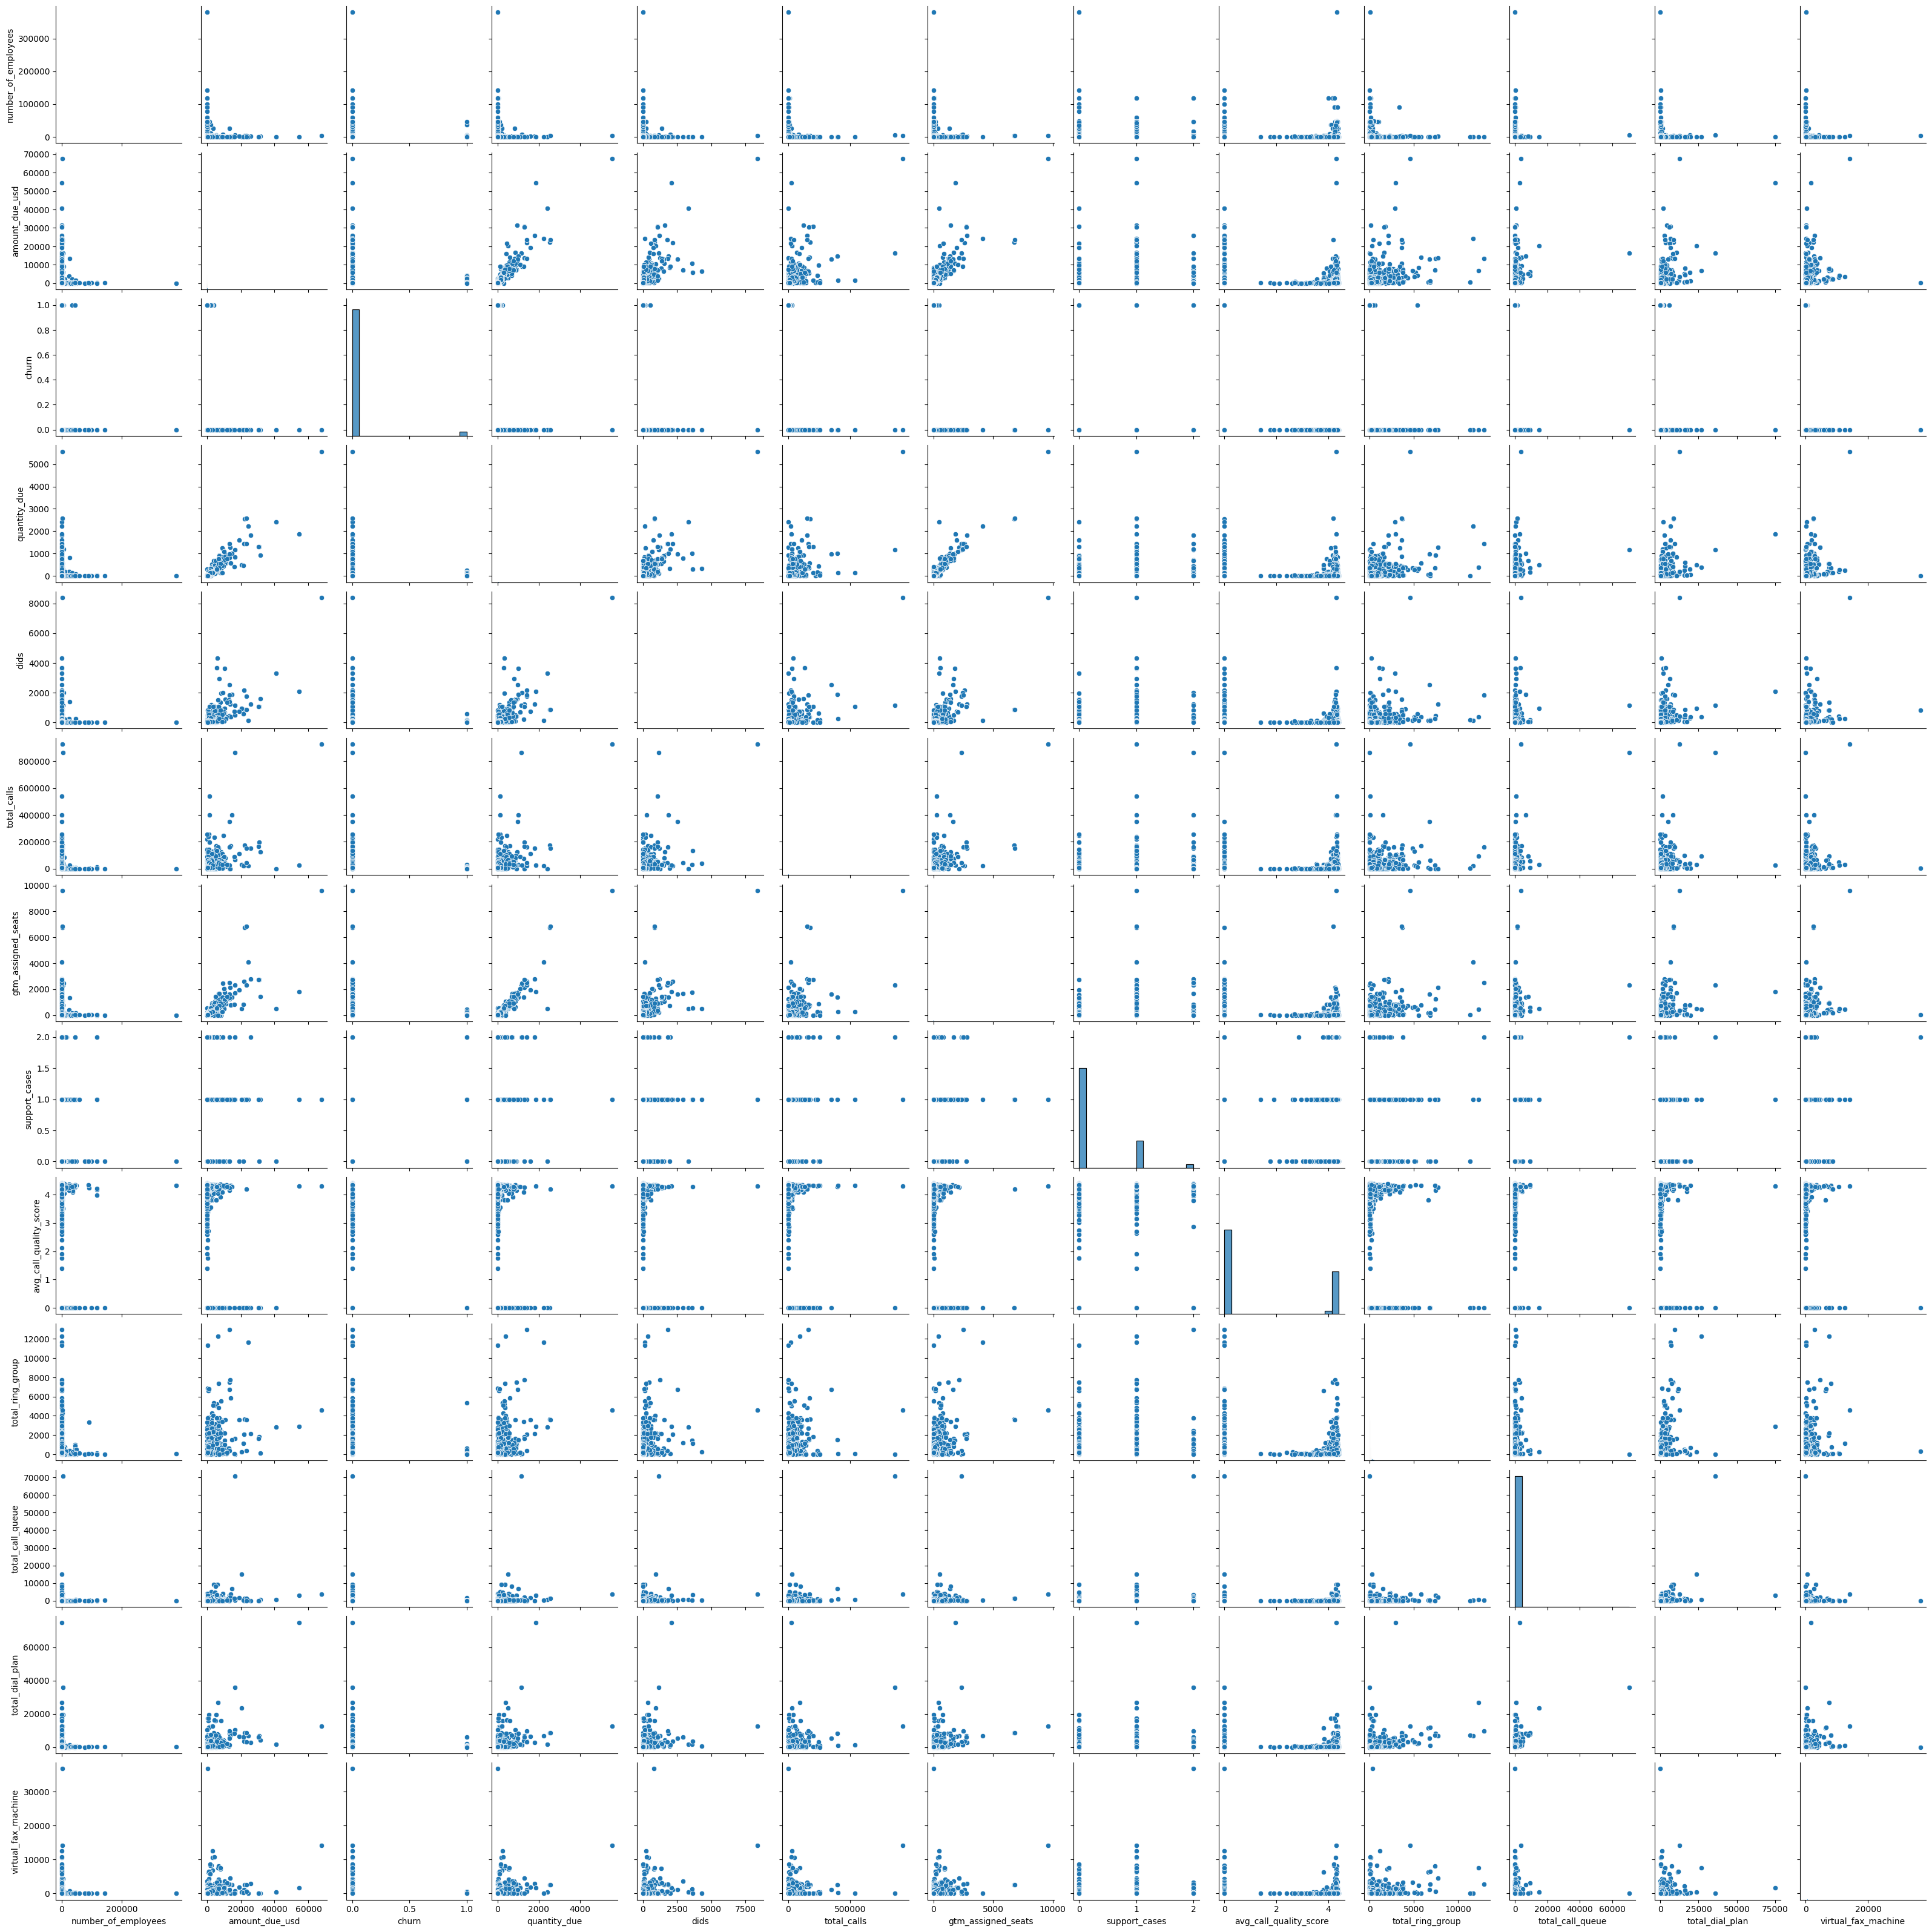

In [ ]:
sns.pairplot(df[selected_cols])

In [ ]:
df[numerical_cols].corr()

,number_of_employees,amount_due_usd,churn,quantity_due,monthly_amount_due_usd,monthly_price_per_seat_due_usd,total_product_owned,dids,total_calls,total_internal_calls,total_outgoing_calls,total_incoming_calls,total_forwarded_calls,total_call_duration,total_call_jointime,total_call_outbound_duration,total_call_inbound_duration,total_incoming_calls_answered,total_incoming_calls_notanswered,total_incoming_calls_failed,total_incoming_calls_busy,total_outgoing_calls_answered,total_outgoing_calls_notanswered,total_outgoing_calls_failed,total_outgoing_calls_busy,total_calls_recorded,total_calls_not_recorded,sum_all_cases,inbound_calls_by_dids,outbound_calls_by_dids,inbound_mins_by_dids,outbound_mins_by_dids,gtm_assigned_seats,total_gtm_sessions_fin,avg_gtm_session_duration_fin,total_gtm_organizers_fin,total_gtm_attendees_fin,total_gtm_organizer_duration_fin,total_gtm_attendee_duration_fin,total_gtm_pstn_duration_fin,total_gtm_voip_duration_fin,total_gtm_webcam_duration_fin,company_size_small_business,company_size_large_size_business,company_size_not_available,company_size_mid_size_business,market_aus_row,market_emea,market_latam,market_na,support_cases,avg_call_quality_score,total_ring_group,total_call_queue,total_dial_plan,virtual_fax_machine
number_of_employees,1.000000,0.007002,-0.003797,0.011888,0.007002,-0.012733,0.179727,0.008975,0.007778,0.000627,0.004000,0.009725,-0.000244,0.009793,0.004165,0.006328,0.010504,0.010317,-0.000364,0.000769,-0.001072,0.004853,0.000014,0.004263,-0.000517,-0.005092,0.013347,0.002399,0.005822,0.000856,0.006962,0.008601,0.011249,0.000907,-0.006558,0.000314,0.000910,-0.000398,0.000832,-0.000563,0.000669,0.002013,-0.125941,0.369886,0.000769,-0.033266,-0.004402,-0.002031,-0.016241,0.016966,0.093533,-0.001436,0.007495,0.010535,0.002385,0.003408
amount_due_usd,0.007002,1.000000,-0.023241,0.928509,1.000000,-0.043866,0.098894,0.736671,0.574436,0.261884,0.508255,0.503062,0.256034,0.611960,0.526730,0.600848,0.520326,0.485269,0.334139,0.151930,0.152068,0.541966,0.181202,0.148652,0.211055,0.190357,0.579512,0.009038,-0.005649,0.006674,0.008081,0.017224,0.849118,0.417291,0.070277,0.390959,0.438908,0.337339,0.422473,0.387121,0.398209,0.398461,-0.123899,0.128126,0.037806,0.070608,0.018894,-0.004854,-0.051409,0.046358,0.106845,0.031051,0.471340,0.243862,0.557088,0.329466
churn,-0.003797,-0.023241,1.000000,-0.020708,-0.023241,0.021992,-0.007790,-0.019186,-0.028279,-0.021129,-0.027120,-0.022671,-0.014937,-0.027844,-0.031618,-0.031959,-0.020613,-0.022069,-0.015175,-0.001336,-0.003211,-0.027778,-0.012369,-0.007552,-0.016247,-0.014996,-0.024602,0.017512,-0.039269,-0.013922,-0.029660,-0.035110,-0.022030,-0.007229,-0.015043,-0.006987,-0.007245,-0.007424,-0.007628,-0.008043,-0.007347,-0.002376,-0.056638,-0.002769,0.035972,0.058540,0.006370,-0.005867,0.036992,-0.035269,0.086631,-0.131695,-0.042816,-0.011546,-0.029768,-0.024337
quantity_due,0.011888,0.928509,-0.020708,1.000000,0.928509,-0.040362,0.089641,0.752938,0.608690,0.278743,0.565731,0.507040,0.259662,0.628804,0.559358,0.651258,0.513017,0.490194,0.331422,0.157931,0.141393,0.600818,0.208039,0.184391,0.232942,0.200303,0.615850,0.008458,-0.004692,0.011599,0.005803,0.018121,0.947732,0.450390,0.071498,0.418500,0.460013,0.356252,0.447811,0.386420,0.424051,0.447952,-0.131744,0.160707,0.053720,0.063162,0.010604,0.000967,-0.019790,0.016437,0.110253,0.027884,0.486202,0.230182,0.448535,0.350549
monthly_amount_due_usd,0.007002,1.000000,-0.023241,0.928509,1.000000,-0.043866,0.098894,0.736671,0.574436,0.261884,0.508255,0.503062,0.256034,0.611960,0.526730,0.600848,0.520326,0.485269,0.334139,0.151930,0.152068,0.541966,0.181202,0.148652,0.211055,0.190357,0.579512,0.009038,-0.005649,0.006674,0.008081,0.017224,0.849118,0.417291,0.070277,0.390959,0.438908,0.337339,0.422473,0.387121,0.398209,0.398461,-0.123899,0.128126,0.037806,0.070608,0.018894,-0.004854,-0.051409,0.046358,0.106845,0.031051,0.471340,0.243862,0.557088,0.329466
monthly_price_per_seat_due_usd,-0.012733,-0.043866,0.021992,-0.04

In [14]:
def strongly_correlated_variables(correlation_matrix, threshold=0.8):
    # Get the upper triangle of the correlation matrix (excluding the diagonal)
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Find strongly correlated variable pairs and their correlation values
    strongly_correlated_vars = []
    for col in upper_triangle.columns:
        correlated_cols = upper_triangle.index[upper_triangle[col].abs() > threshold]
        for correlated_col in correlated_cols:
            correlation_value = upper_triangle[col][correlated_col]
            strongly_correlated_vars.append({
                "attribute_1": col,
                "attribute_2": correlated_col,
                "correlation": correlation_value
            })

    return strongly_correlated_vars

# Assuming 'correlation_matrix' is your correlation matrix, calculated with df[numerical_cols].corr()
correlation_matrix = df[numerical_cols].corr()
strongly_correlated_vars = strongly_correlated_variables(correlation_matrix, threshold=0.8)

correlation_df = pd.DataFrame(strongly_correlated_vars).sort_values('correlation')

#cols_to_drop = correlation_df.loc[abs(correlation_df.correlation) > 0.9].attribute_2.values
#cols_to_drop

## total_calls has a high correlation to a bunch of the other columns in the dataset (given that they are subsets of calls that makes sense)
## amount_due_usd and monthly_amount_due_usd are the exact same so one can be dropped
## total_incoming_calls_answered and total_incoming_calls have a 0.99% correlation so one can get dropped. Given that this dataset seems to be split into subsets I will remove the total_incoming_calls so we have a full distribution of the subsets
## total_gtm_organizers_fin and total_gtm_sessions_fin have a 0.98% correlation. That would make sense as usually there is one organizer per session of a meeting, One will be dropped
correlation_df

,attribute_1,attribute_2,correlation
53,market_na,market_latam,-0.945724
52,company_size_mid_size_business,company_size_small_business,-0.903810
47,total_gtm_webcam_duration_fin,total_gtm_sessions_fin,0.811503
48,total_gtm_webcam_duration_fin,total_gtm_organizers_fin,0.816008
27,total_calls_not_recorded,total_call_inbound_duration,0.818366
26,total_calls_not_recorded,total_call_duration,0.828773
28,total_calls_not_recorded,total_incoming_calls_answered,0.829380
24,total_calls_not_recorded,total_calls,0.829387
49,total_gtm_webcam_duration_fin,total_gtm_attendees_fin,0.834363
41,total_gtm_attendee_duration_fin,total_gtm_organizer_duration_fin,0.834400


In [ ]:
from abc import ABC, abstractmethod
from enum import Enum
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_regression, f_classif
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, brier_score_loss, log_loss
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score

class FeatureSelectionOptions(str,Enum):
    none = 'none'
    correlation = 'correlation'
    rfe = 'rfe'
    kbest = 'kbest'
    lasso = 'lasso'

class BaseModel:
    def __init__(self,df, target, attributes, metadata):
        self.target = target
        self.attributes = attributes
        self.metadata = metadata
        self.date = None
        self.train_df = None
        self.X_train = None
        self.y_train = None
        self.meta_train = None
        self.model = None
        self.feature_importances = None
        self.selected_features = None
        self.hyperparameters = {}
        self.load_dataset(df)

    def load_dataset(self, df) -> None:
        '''
        Load dataset in and define train, test split condition
        '''
        self.train_df = df
        self.X_train = df[self.attributes]
        self.y_train = df[self.target]
        self.meta_train = df[self.metadata]

    def select_n_features(self,mode:FeatureSelectionOptions,n = 10,model = None):
        if n < 2 or n > self.X_train.shape[1]:
            raise Exception(f'Invalid n selection for training set that has {self.X_train.shape[1]} columns')

        if mode == FeatureSelectionOptions.correlation:
            corr_matrix = self.train_df[self.target+self.attributes].corr()
            top_correlated_vars = corr_matrix[self.target].abs().sort_values(self.target,ascending=False).index[1:n+1]
            self.selected_features = top_correlated_vars
        elif mode == FeatureSelectionOptions.rfe:
            if model is None:
                print('No model added for RFE mode defaulting to Random Forest')
                model = RandomForestClassifier(random_state=42)
            self.model = model
            rfe = RFE(self.model, n_features_to_select=n)

            # Fit the RFE object to the data
            rfe.fit(self.X_train, self.y_train)
            selected_features_names = self.X_train.columns[rfe.support_]
            self.selected_features = selected_features_names
        elif mode == FeatureSelectionOptions.kbest:
            # X is the feature matrix and y is the target variable
            selector = SelectKBest(score_func=f_classif, k=n)
            _ = selector.fit_transform(self.X_train, self.y_train)
            selected_features_indices = selector.get_support(indices=True)
            selected_features_names = self.X_train.columns[selected_features_indices]
            self.selected_features = selected_features_names
        elif mode == FeatureSelectionOptions.lasso:
            lasso = Lasso(alpha=0.1)
            lasso.fit(self.X_train, self.y_train)
            coef = pd.Series(abs(lasso.coef_), index=self.X_train.columns).sort_values(ascending=False)
            top_features = coef.index[:n]
            self.selected_features = top_features

    def feature_importances_model(self):
        features = []
        pred_df = self.X_test[self.selected_features]
        # Handle different model feature importance properties
        importance = None
        try:
            importance = self.model.feature_importances_
        except Exception:
            pass
        try:
            importance = self.model.coef_
            # print(importance)
        except Exception:
            pass

        try:
            importance = self.model.get_score(importance_type='gain')
            features = [{'col': k, 'score': v} for k, v in importance.items()]
            df = pd.DataFrame(features).sort_values('score')
            self.feature_importances = df
            return
            # print(importance)
        except Exception:
            pass

        if importance is None:
            return None
        # summarize feature importance
        for i, v in enumerate(importance):
            features.append({'col': pred_df.columns[i], 'score': v})
            # print(f'Feature: {X_test.columns[i]}, Score: {v}')
        df = pd.DataFrame(features).sort_values('score')
        self.feature_importances = df

In [ ]:
df.columns

Index(['Account_id', 'contract_start_date', 'contract_end_date',
       'number_of_employees', 'amount_due_usd', 'churn', 'quantity_due',
       'monthly_amount_due_usd', 'monthly_price_per_seat_due_usd',
       'total_product_owned', 'dids', 'total_calls', 'total_internal_calls',
       'total_outgoing_calls', 'total_incoming_calls', 'total_forwarded_calls',
       'total_call_duration', 'total_call_jointime',
       'total_call_outbound_duration', 'total_call_inbound_duration',
       'total_incoming_calls_answered', 'total_incoming_calls_notanswered',
       'total_incoming_calls_failed', 'total_incoming_calls_busy',
       'total_outgoing_calls_answered', 'total_outgoing_calls_notanswered',
       'total_outgoing_calls_failed', 'total_outgoing_calls_busy',
       'total_calls_recorded', 'total_calls_not_recorded', 'sum_all_cases',
       'inbound_calls_by_dids', 'outbound_calls_by_dids',
       'inbound_mins_by_dids', 'outbound_mins_by_dids', 'gtm_assigned_seats',
       'total_gtm

In [ ]:
target = ['churn']

metadata = ['Account_id', 'contract_start_date', 'contract_end_date']

attributes = ['number_of_employees', 'amount_due_usd', 'quantity_due',
       'monthly_amount_due_usd', 'monthly_price_per_seat_due_usd',
       'total_product_owned', 'dids', 'total_calls', 'total_internal_calls',
       'total_outgoing_calls', 'total_incoming_calls', 'total_forwarded_calls',
       'total_call_duration', 'total_call_jointime',
       'total_call_outbound_duration', 'total_call_inbound_duration',
       'total_incoming_calls_answered', 'total_incoming_calls_notanswered',
       'total_incoming_calls_failed', 'total_incoming_calls_busy',
       'total_outgoing_calls_answered', 'total_outgoing_calls_notanswered',
       'total_outgoing_calls_failed', 'total_outgoing_calls_busy',
       'total_calls_recorded', 'total_calls_not_recorded', 'sum_all_cases',
       'inbound_calls_by_dids', 'outbound_calls_by_dids',
       'inbound_mins_by_dids', 'outbound_mins_by_dids', 'gtm_assigned_seats',
       'total_gtm_sessions_fin', 'total_gtm_session_duration_fin',
       'avg_gtm_session_duration_fin', 'total_gtm_organizers_fin',
       'total_gtm_attendees_fin', 'total_gtm_organizer_duration_fin',
       'total_gtm_attendee_duration_fin', 'total_gtm_pstn_duration_fin',
       'total_gtm_voip_duration_fin', 'total_gtm_webcam_duration_fin',
       'company_size_small_business', 'company_size_large_size_business',
       'company_size_not_available', 'company_size_mid_size_business',
       'market_aus_row', 'market_emea', 'market_latam', 'market_na',
       'support_cases', 'avg_call_quality_score', 'total_ring_group',
       'total_call_queue', 'total_dial_plan', 'virtual_fax_machine']

base_model = BaseModel(df,target,attributes,metadata)

In [ ]:
base_model.target

['churn']

In [ ]:
base_model.select_n_features(FeatureSelectionOptions.kbest,n=25)
base_model.selected_features

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['amount_due_usd', 'monthly_amount_due_usd', 'total_calls',
       'total_outgoing_calls', 'total_incoming_calls', 'total_call_duration',
       'total_call_jointime', 'total_call_outbound_duration',
       'total_incoming_calls_answered', 'total_outgoing_calls_answered',
       'total_calls_not_recorded', 'inbound_calls_by_dids',
       'inbound_mins_by_dids', 'outbound_mins_by_dids', 'gtm_assigned_seats',
       'company_size_small_business', 'company_size_not_available',
       'company_size_mid_size_business', 'market_latam', 'market_na',
       'support_cases', 'avg_call_quality_score', 'total_ring_group',
       'total_dial_plan', 'virtual_fax_machine'],
      dtype='object')

## Info about the data

- Account_Id is not unique
- A lot of the columns have skewed data
- Our target variable is skewed
- There are outliers that need to be handled
- There are no missing attributes
- Total_calls has a high correlation to a lot of the columns in the dataset (given that they are subsets of calls that would make sense)
- amount_due_usd and monthly_amount_due_usd are the exact same so one can be dropped
- total_incoming_calls_answered and total_incoming_calls have a 0.99% correlation so one can get dropped. Given that this dataset seems to be split into subsets I will remove the total_incoming_calls so we have a full distribution of the subsets
- total_gtm_organizers_fin and total_gtm_sessions_fin have a 0.98% correlation. That would make sense as usually there is one organizer per session of a meeting, One will be dropped




In [ ]:
duplicated_account_records_df = df.groupby('Account_id')['churn'].count().reset_index().sort_values('churn',ascending=False)
duplicated_account_records_df

,Account_id,churn
5545,1111A11112Dnvi7QAA,65
4368,1111A11112Dni0mQAA,55
1720,1111A111120OudGQAS,54
9389,1113111111Mvk8oAAA,48
4438,1111A11112DniLEQAZ,40
...,...,...
5785,1111A11112DnxFGQAZ,1
5786,1111A11112DnxFIQAZ,1
5788,1111A11112DnxFnQAJ,1
5789,1111A11112DnxFuQAJ,1


In [ ]:
df.loc[df.Account_id=='1111A11112Dnvi7QAA'].sort_values('contract_start_date')

,Account_id,contract_start_date,contract_end_date,number_of_employees,amount_due_usd,churn,quantity_due,monthly_amount_due_usd,monthly_price_per_seat_due_usd,total_product_owned,dids,total_calls,total_internal_calls,total_outgoing_calls,total_incoming_calls,total_forwarded_calls,total_call_duration,total_call_jointime,total_call_outbound_duration,total_call_inbound_duration,total_incoming_calls_answered,total_incoming_calls_notanswered,total_incoming_calls_failed,total_incoming_calls_busy,total_outgoing_calls_answered,total_outgoing_calls_notanswered,total_outgoing_calls_failed,total_outgoing_calls_busy,total_calls_recorded,total_calls_not_recorded,sum_all_cases,inbound_calls_by_dids,outbound_calls_by_dids,inbound_mins_by_dids,outbound_mins_by_dids,gtm_assigned_seats,total_gtm_sessions_fin,total_gtm_session_duration_fin,avg_gtm_session_duration_fin,total_gtm_organizers_fin,total_gtm_attendees_fin,total_gtm_organizer_duration_fin,total_gtm_attendee_duration_fin,total_gtm_pstn_duration_fin,total_gtm_voip_duration_fin,total_gtm_webcam_duration_fin,company_size_small_business,company_size_large_size_business,company_size_not_available,company_size_mid_size_business,market_aus_row,market_emea,market_latam,market_na,support_cases,avg_call_quality_score,total_ring_group,total_call_queue,total_dial_plan,virtual_fax_machine
8772,1111A11112Dnvi7QAA,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,800,163.10,0,8,163.10,20.39,12,14,91608,2442,69124,22484,0,12300000.0,926816,8664568.0,3595108.0,19294,1452,0,1738,60368,8206,0,550,91520,0,34,1606.00,4937.43,247305.14,550983.71,12,22,0.00,0.00,0,0,0.00,0.00,0.0,0.00,0.0,0,1,0,0,0,0,0,1,2,4.32,60,0,60,60
6992,1111A11112Dnvi7QAA,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,800,84.79,0,4,84.79,21.20,12,1,7106,88,3674,3432,0,1306052.0,38720,879714.0,426338.0,3432,0,0,0,3432,220,0,22,0,7106,34,3432.00,3674.00,426118.00,839190.00,0,22,0.00,0.00,0,0,0.00,0.00,0.0,0.00,0.0,0,1,0,0,0,0,0,1,2,0.00,60,30,120,60
8010,1111A11112Dnvi7QAA,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,800,69.90,0,3,69.90,23.30,12,5,10912,0,3366,7546,0,2109558.0,109912,628276.0,1481282.0,6072,1408,0,66,3212,154,0,0,0,10912,34,1509.20,673.20,274727.20,116670.40,6,22,0.00,0.00,0,0,0.00,0.00,0.0,0.00,0.0,0,1,0,0,0,0,0,1,2,0.00,60,0,60,60
18467,1111A11112Dnvi7QAA,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,800,91.60,0,3,91.60,30.53,12,1,5984,0,2948,3036,0,1320814.0,45914,709852.0,610962.0,2046,924,0,66,2662,242,0,44,0,5984,34,3036.00,2948.00,567820.00,682726.00,0,22,0.00,0.00,0,0,0.00,0.00,0.0,0.00,0.0,0,1,0,0,0,0,0,1,2,4.35,60,0,60,0
19250,1111A11112Dnvi7QAA,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,800,46.80,0,2,46.80,23.40,12,3,15312,0,4180,7370,3762,1985676.0,117040,1095446.0,710380.0,4972,1914,0,484,3894,286,0,0,0,15312,34,2456.67,1393.33,210430.00,345612.67,0,22,0.00,0.00,0,0,0.00,0.00,0.0,0.00,0.0,0,1,0,0,0,0,0,1,2,4.25,60,0,180,60
9788,1111A11112Dnvi7QAA,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,800,80.80,0,4,80.80,20.20,12,4,10978,88,6534,4444,0,2793560.0,62172,2186998.0,606562.0,4444,0,0,0,5874,660,0,0,0,10956,34,1111.00,1633.50,151563.50,528005.50,8,22,0.00,0.00,0,0,0.00,0.00,0.0,0.00,0.0,0,1,0,0,0,0,0,1,2,4.33,120,0,180,60
3869,1111A11112Dnvi7QAA,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,800,229.65,0,7,229.65,32.81,12,11,63976,1496,44308,17468,0,8984932.0,552200,5068426.0,3916506.0,16412,440,22,594,40700,3542,0,66,0,63976,34,1588.00,4028.00,350498.00,407494.00,12,22,0.00,0.00,0,0,0.00,0.00,0.0,0.00,0.0,0,1,0,0,0,0,0,1,2,4.31,180,0,60,60
11190,1111A11112Dnvi7QAA,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,800,86.07,0,3,86.07,28.69,12,6,8074,22,3036,5038,0,1370842.0,78958,734954.0,635888.0,4312,726,0,0,2860,176,0,0,0,8074,34,839.67,506.00,95520.33,117351.67,0,22,0.00,0.00,0,0,0.00,0.00,0.0,0.00,0.0,0,1,0,0,0,0,0,1,2,4.20,60,0,240,60
11319,1111A11112Dnvi7QAA,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,800,129.80,0,4,129.80,32.45,12,2,9812,286,3586,6226,0,2183610.0,66770

## For EDA I plan to look into ways to:
- reduce dimensions in our data
- create variables across sparse, skewed attributes
- remove highly correlated variables
- Include time dependant attributes (start and end contract date)
- Additional Feature Engineering